In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

In [104]:
df = pd.read_excel('wide_range.xlsx')
X = df.iloc[:,1:]
y = df.iloc[:,0]

X.columns = X.columns.astype(str)
X = X.apply(lambda x: x*(10**12))

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=101)

In [106]:
y_train

805     370.341309
1798    358.717780
193     303.578596
162     281.108362
1211    300.756094
           ...    
599     274.142753
1599    318.512434
1361    370.224132
1547    308.722907
863     338.422663
Name: layer 1, Length: 1540, dtype: float64

In [107]:
forest = RandomForestRegressor(n_estimators=500, random_state=101)

forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=101)

In [109]:
importances = forest.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

feat_labels = df.columns[1:]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) 3.95e-06                       0.737534
 2) 4e-06                          0.093139
 3) 4.65e-06                       0.046497
 4) 4.4e-06                        0.021565
 5) 4.35e-06                       0.016212
 6) 4.7e-06                        0.010705
 7) 4.5e-06                        0.009430
 8) 4.6e-06                        0.009288
 9) 4.45e-06                       0.008803
10) 4.3e-06                        0.006834
11) 4.55e-06                       0.006439
12) layer 4                        0.003642
13) layer 6                        0.003590
14) layer 5                        0.003293
15) 3.9e-06                        0.002962
16) 4.25e-06                       0.002549
17) layer 7                        0.001751
18) layer 2                        0.001472
19) 4.05e-06                       0.001379
20) layer 9                        0.001293
21) layer 8                        0.001041
22) 4.75e-06                       0.001037
23) layer 3                     

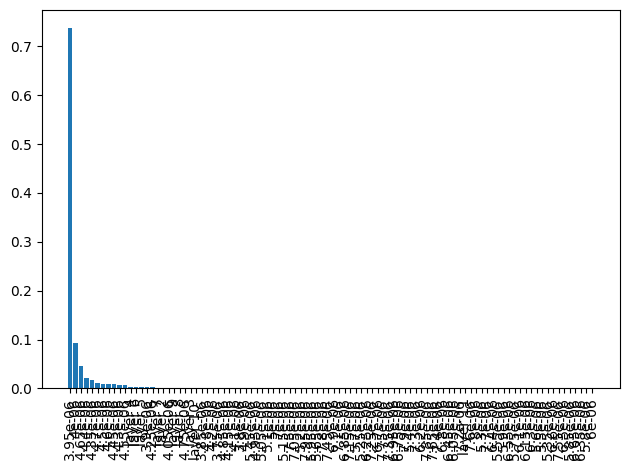

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()